# Importing Libraries

Previous Autoclass was written using Tensorflow 1.14 functions, so we need to downgrade to TF 1.x to run this code 

Todo: update code to TF 2.0 :/

In [0]:
%tensorflow_version 1.x
!pip install rasterio

TensorFlow 1.x selected.
     |████████████████████████████████| 18.1MB 196kB/s 


In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tqdm.autonotebook import tqdm
import tensorflow as tf
import pandas as pd
import numpy as np
import subprocess
import argparse
import time
import os
import matplotlib.pyplot as plt
import rasterio
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  """


# Installing GDAL

In [0]:
!apt-get update
!apt-get install libgdal-dev -y
!apt-get install python-gdal -y
!apt-get install python-numpy python-scipy -y
!pip install rasterio
import gdal 

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [91.7 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelea

# Copying over data from Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp "/content/drive/Shared drives/SIO and E4E Mangroves /Data/Machine Learning/Training Images/mvnm.zip" .
!unzip mvnm.zip 

Streaming output truncated to the last 5000 lines.
  inflating: psc_2018-05_site10/psc_2018-05_site10_120m_RGB_064_097.tif  
  inflating: psc_2018-05_site10/psc_2018-05_site10_120m_RGB_064_098.tif  
  inflating: psc_2018-05_site10/psc_2018-05_site10_120m_RGB_064_099.tif  
  inflating: psc_2018-05_site10/psc_2018-05_site10_120m_RGB_064_100.tif  
  inflating: psc_2018-05_site10/psc_2018-05_site10_120m_RGB_064_101.tif  
  inflating: psc_2018-05_site10/psc_2018-05_site10_120m_RGB_064_102.tif  
  inflating: psc_2018-05_site10/psc_2018-05_site10_120m_RGB_064_103.tif  
  inflating: psc_2018-05_site10/psc_2018-05_site10_120m_RGB_064_104.tif  
  inflating: psc_2018-05_site10/psc_2018-05_site10_120m_RGB_064_105.tif  
  inflating: psc_2018-05_site10/psc_2018-05_site10_120m_RGB_064_106.tif  
  inflating: psc_2018-05_site10/psc_2018-05_site10_120m_RGB_064_107.tif  
  inflating: psc_2018-05_site10/psc_2018-05_site10_120m_RGB_064_108.tif  
  inflating: psc_2018-05_site10/psc_2018-05_site10_120m_RGB_0

In [0]:
#converting jpeg to tif

!sudo apt-get install imagemagick
!for f in /content/lap_2019-07_site3/*.tif; do  echo "Converting $f"; convert "$f"  "$(basename "$f" .tif).jpg"; done
!mv *.jpg /content/lap_2019-07_site3/


Streaming output truncated to the last 5000 lines.
convert-im6.q16: Unknown field with tag 34737 (0x87b1) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/912.
Converting /content/lap_2019-07_site3/lap_2019-07_site03_120m_RGB_quick_42_35.tif
convert-im6.q16: Unknown field with tag 33550 (0x830e) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/912.
convert-im6.q16: Unknown field with tag 33922 (0x8482) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/912.
convert-im6.q16: Unknown field with tag 34735 (0x87af) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/912.
convert-im6.q16: Unknown field with tag 34736 (0x87b0) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/912.
convert-im6.q16: Unknown field with tag 34737 (0x87b1) encountered. `TIFFReadDirectory' @ warning/tiff.c/TIFFWarnings/912.
Converting /content/lap_2019-07_site3/lap_2019-07_site03_120m_RGB_quick_42_36.tif
convert-im6.q16: Unknown field with tag 33550 (

In [0]:
!cp "/content/drive/Shared drives/SIO and E4E Mangroves /Data/Machine Learning/Models/MVNM_Model_R2.zip" .
!unzip MVNM_Model_R2.zip  

Archive:  MVNM_Model_R2.zip
  inflating: output_graph.pb         
 extracting: output_labels.txt       


# TensorFlow Functions

In [0]:

def load_labels(label_file):
	label = []
	proto_as_ascii_lines = tf.io.gfile.GFile(label_file).readlines()
	for l in proto_as_ascii_lines:
		label.append(l.rstrip())
	return label

def load_graph(model_file):
	graph = tf.Graph()
	graph_def = tf.compat.v1.GraphDef()
	with open(model_file, "rb") as f:
		graph_def.ParseFromString(f.read())
	with graph.as_default():
		tf.import_graph_def(graph_def)
		# locks graph to prevent new operations from being added
		graph.finalize()
	return graph


def read_tensor_from_image_file(file_name):
	input_name = "file_reader"

	# adding data processing pipeline to CPU explicitly
	with tf.device('/cpu:0'):
		file_reader = tf.io.read_file(file_name, input_name)
		if file_name.endswith(".png"):
			image_reader = tf.image.decode_png(file_reader, channels=3, name="png_reader")
		elif file_name.endswith(".gif"):
			image_reader = tf.squeeze(tf.image.decode_gif(file_reader, name="gif_reader"))
		elif file_name.endswith(".bmp"):
			image_reader = tf.image.decode_bmp(file_reader, name="bmp_reader")
		else:
			image_reader = tf.image.decode_jpeg(file_reader, channels=3, name="jpeg_reader")
			float_caster = tf.cast(image_reader, tf.float32)
	# tensor dimensions (299, 299, 3)
	return float_caster

def preprocess_image_batch(batch,
						input_height=299,
						input_width=299,
						input_mean=0,
						input_std=255):
	resized = tf.compat.v1.image.resize_bilinear(batch, [input_height, input_width])
	normalized = tf.divide(tf.subtract(resized, [input_mean]), [input_std])
	sess = tf.compat.v1.Session()
	result = sess.run(normalized)
	return result

def generate_batches(filenames, batch_size):
	# list of lists of size batch_size containing file names
 	batches = [filenames[i * batch_size:(i + 1) * batch_size] for i in range((len(filenames) + batch_size - 1) // batch_size)]  
 	num_batches = len(batches)
 	return batches, num_batches

# Classification Parameters

In [0]:
#default args
input_height = 299
input_width = 299
input_mean = 0
input_std = 255
input_layer = "input"
output_layer = "final_result"
input_layer = "Placeholder"
batch_size = 128

#add arguments for classifier

output_file = "results.csv"


model_file = "/content/output_graph.pb"
image_directory = "/content/lap_2019-07_site3"
label_file = "/content/output_labels.txt"
output_layer = "final_result"

# Loading tf graph and creating list of files to process
graph = load_graph(model_file)
file_list = []
for root, dirs, files in os.walk(os.path.abspath(image_directory)):
    for file in files:
                    file_list.append(os.path.join(root, file))

input_name = "import/" + input_layer
output_name = "import/" + output_layer
input_operation = graph.get_operation_by_name(input_name)
output_operation = graph.get_operation_by_name(output_name)



In [0]:
!rm -rf /content/lap_2019-07_site1/nm
!rm -rf /content/lap_2019-07_site1/m

# Classifying Images

In [0]:
#load labels and create
labels = load_labels(label_file)
labels.append('file')
result_df = pd.DataFrame(columns=labels)
cwd = os.getcwd()
count = 0

# generating batches
filenames = [os.path.join(image_directory, file) for file in os.listdir(image_directory) if not file.endswith(".tif")]
batches, num_batches = generate_batches(filenames, batch_size)


# preprocess imagery
for i in tqdm(range(num_batches)):
	files = batches[i]
	image_batch = list(map(read_tensor_from_image_file, batches[i]))
	image_batch = preprocess_image_batch(image_batch)

	with tf.compat.v1.Session(graph=graph) as sess:
		results = sess.run(output_operation.outputs[0], {
			input_operation.outputs[0]: image_batch})
		# writing result files
		file_num = 0
		for result in results:
			cur_result = pd.DataFrame(columns=labels)
			top_k = result.argsort()[-5:][::-1]
			cur_result.at[0, 'file'] = files[file_num]  
			file_num += 1
			for i in top_k:
				#print(labels[i], result[i])
				cur_result.at[0, labels[i]] =  result[i]
			#add and write result to the csv
			result_df = result_df.append(cur_result)
			result_df.to_csv(output_file)
		# for logs
		num_processed = len(image_batch)
		count += num_processed


labels.remove('file')
print("Finding highest probability classes")
result_df[labels] = result_df[labels].apply(pd.to_numeric, errors='coerce')
result_df['max'] = result_df[labels].idxmax(axis=1)
result_df.to_csv(output_file)
print("Done!")


Finding highest probability classes
Done!


# Visualization and uploading data to drive

In [0]:
dest_folders = []
#Organize tiles into folders
for index, row in tqdm(result_df.iterrows()):
	cur_file = row['file']
	cur_file = cur_file.replace("jpg","tif",2)
	classification = row['max'] 
	dest_folder = os.path.join(os.path.abspath(image_directory),classification)
	dest_folders.append(dest_folder)
	if os.path.exists(dest_folder) == False:
		os.mkdir(dest_folder)
	dest = os.path.join(dest_folder,os.path.basename(cur_file))
	src = cur_file
	os.rename(src, dest)
 

#for dest in list(set(dest_folders)):
#	call = "gdal_merge.py -o " + os.getcwd()  + " " + os.path.join(dest, "*")
#	print(call)
#	subprocess.call(call, shell=True)


In [0]:
!gdal_merge.py -o /content/lap_2019-07_site3nm.tif /content/lap_2019-07_site3/nm/*
!gdal_merge.py -o /content/lap_2019-07_site3m.tif /content/lap_2019-07_site3/m/*

0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.


In [0]:
!cp "/content/psc_2018-05_site10nm.tif" "/content/drive/Shared drives/SIO and E4E Mangroves /Data/Visualizations/Orthos/psc_2018-05_site10nm.tif"
!cp "/content/psc_2018-05_site10m.tif" "/content/drive/Shared drives/SIO and E4E Mangroves /Data/Visualizations/Orthos/psc_2018-05_site10m.tif"

CAUTION: Keep in mind that these will crash your instance if the orthmosaics are above ~2GB, so please be careful with the 

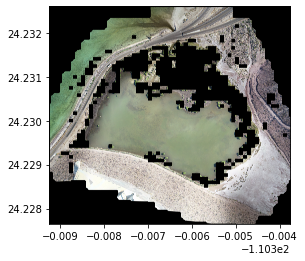

In [0]:
from rasterio.plot import show
src = rasterio.open("/content/lap_2019-07_site3nm.tif")
rasterio.plot.show(src)

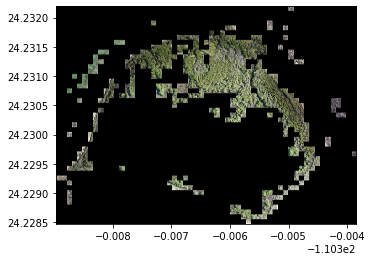

In [0]:
src = rasterio.open("/content/lap_2019-07_site3m.tif")
show(src)